## Importing the libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error

import warnings
warnings.filterwarnings('ignore')

## Importing the dataset

In [2]:
dataset = pd.read_csv('Binance Coin - Historic data.csv')


In [3]:
dataset.head()
print(dataset.columns)
dataset.info()

Index(['Date', 'Price(in dollars)', 'Open', 'High', 'Low', 'Vol.', 'Change%'], dtype='object')
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1357 entries, 0 to 1356
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Date               1357 non-null   object 
 1   Price(in dollars)  1357 non-null   float64
 2   Open               1357 non-null   float64
 3   High               1357 non-null   float64
 4   Low                1357 non-null   float64
 5   Vol.               1357 non-null   object 
 6   Change%            1357 non-null   float64
dtypes: float64(5), object(2)
memory usage: 74.3+ KB


In [4]:
for x in range(dataset['Vol.'].shape[0]):
    val = dataset["Vol."].iloc[x]
    if "M" in val:
        dataset["Vol."].iloc[x] = float(val[:-1]) * 1000000
        pass
    elif "K" in val:
        dataset["Vol."].iloc[x] = float(val[:-1]) * 1000
dataset["Vol."]

0       2.26e+06
1       2.86e+06
2       1.25e+06
3       1.81e+06
4       1.98e+06
          ...   
1352      166010
1353      456480
1354      256710
1355      483230
1356      283350
Name: Vol., Length: 1357, dtype: object

In [5]:
dataset['Vol.']=pd.to_numeric(dataset['Vol.'],errors='coerce')
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1357 entries, 0 to 1356
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Date               1357 non-null   object 
 1   Price(in dollars)  1357 non-null   float64
 2   Open               1357 non-null   float64
 3   High               1357 non-null   float64
 4   Low                1357 non-null   float64
 5   Vol.               1356 non-null   float64
 6   Change%            1357 non-null   float64
dtypes: float64(6), object(1)
memory usage: 74.3+ KB


In [6]:
dataset['Date'] = pd.to_datetime(dataset['Date'])
dataset['month'] = dataset['Date'].dt.month
dataset['year'] = dataset['Date'].dt.year
dataset['month_year'] = dataset['Date'].dt.to_period('M')
dataset

,Date,Price(in dollars),Open,High,Low,Vol.,Change%,month,year,month_year
0,2021-07-27,303.29,304.31,307.62,298.53,2260000.0,-0.33,7,2021,2021-07
1,2021-07-26,304.31,302.60,327.62,301.19,2860000.0,0.58,7,2021,2021-07
2,2021-07-25,302.57,302.55,303.09,292.85,1250000.0,-0.19,7,2021,2021-07
3,2021-07-24,303.15,298.91,305.01,296.16,1810000.0,1.42,7,2021,2021-07
4,2021-07-23,298.89,293.51,301.15,281.68,1980000.0,1.83,7,2021,2021-07
...,...,...,...,...,...,...,...,...,...,...
1352,2017-11-13,1.68,1.49,1.74,1.49,166010.0,12.75,11,2017,2017-11
1353,2017-11-12,1.49,1.66,1.70,1.34,456480.0,-10.24,11,2017,2017-11
1354,2017-11-11,1.66,1.71,1.93,1.58,256710.0,-2.92,11,2017,2017-11
1355,2017-11-10,1.71,1.99,2.02,1.60,483230.0,-14.07,11,2017,2017-11


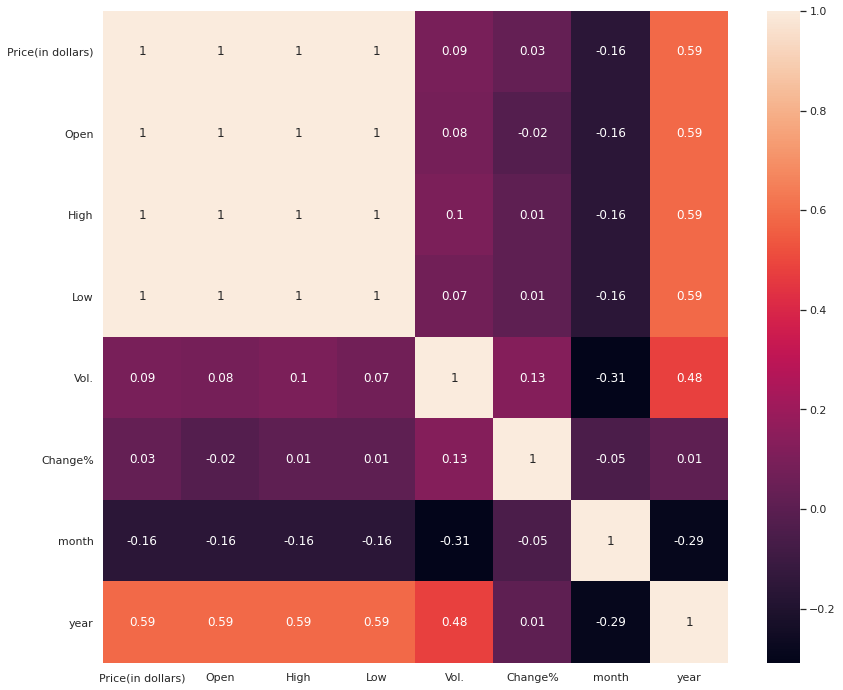

In [7]:
import seaborn as sns
sns.set(rc = {'figure.figsize' : (14,12)})
sns.heatmap(dataset.corr().round(2) , annot = True )

In [8]:
dataset = dataset.drop(columns=['Vol.','Change%','month'])
dataset

,Date,Price(in dollars),Open,High,Low,year,month_year
0,2021-07-27,303.29,304.31,307.62,298.53,2021,2021-07
1,2021-07-26,304.31,302.60,327.62,301.19,2021,2021-07
2,2021-07-25,302.57,302.55,303.09,292.85,2021,2021-07
3,2021-07-24,303.15,298.91,305.01,296.16,2021,2021-07
4,2021-07-23,298.89,293.51,301.15,281.68,2021,2021-07
...,...,...,...,...,...,...,...
1352,2017-11-13,1.68,1.49,1.74,1.49,2017,2017-11
1353,2017-11-12,1.49,1.66,1.70,1.34,2017,2017-11
1354,2017-11-11,1.66,1.71,1.93,1.58,2017,2017-11
1355,2017-11-10,1.71,1.99,2.02,1.60,2017,2017-11


In [9]:
X = np.array(dataset.iloc[ : , 2 : 5].values)
y = dataset.iloc[:, 1].values

In [10]:
print(X)

[[304.31 307.62 298.53]
 [302.6  327.62 301.19]
 [302.55 303.09 292.85]
 ...
 [  1.71   1.93   1.58]
 [  1.99   2.02   1.6 ]
 [  1.99   2.2    1.9 ]]


##Splitting data into Training and Testing

In [11]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

##*Training the XGBoost model on the Training set*

In [12]:
from xgboost import XGBRegressor
regressor = XGBRegressor(objective ="reg:squarederror")
regressor.fit(X_train, y_train)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0,
             importance_type='gain', learning_rate=0.1, max_delta_step=0,
             max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
             n_jobs=1, nthread=None, objective='reg:squarederror',
             random_state=0, reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
             seed=None, silent=None, subsample=1, verbosity=1)

## Predicting the Test set results

In [13]:
y_pred = regressor.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print("MSE: %.2f" % mse)
print("RMSE: %.2f" % (mse**(1/2.0)))

MSE: 25.39
RMSE: 5.04


In [14]:
score = regressor.score(X_train, y_train)  
print("Training score: ", score)
scores = cross_val_score(regressor, X_train, y_train,cv=10)
print("Mean cross-validation score: %.2f" % scores.mean())

Training score:  0.9997230780728985
Mean cross-validation score: 1.00


In [15]:
np.set_printoptions(precision=2)
print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1))

[[  5.47   5.66]
 [ 19.78  19.9 ]
 [  9.56   9.49]
 [  7.99   6.7 ]
 [  2.93   2.66]
 [ 14.63  15.6 ]
 [ 16.34  17.13]
 [ 23.75  23.07]
 [ 15.53  15.01]
 [ 18.33  18.24]
 [ 27.78  28.58]
 [ 13.56  13.99]
 [  2.93   2.79]
 [ 13.56  13.78]
 [  6.21   6.26]
 [ 30.11  29.2 ]
 [ 13.58  13.73]
 [ 26.3   26.23]
 [ 28.89  28.92]
 [ 10.02  10.39]
 [ 12.15  11.97]
 [479.52 472.25]
 [ 12.28  12.12]
 [ 23.75  23.13]
 [  2.27   1.55]
 [  5.71   6.  ]
 [  9.68   9.69]
 [ 12.18  11.89]
 [  3.44   2.65]
 [ 20.21  20.55]
 [274.62 279.45]
 [ 17.79  17.91]
 [ 29.48  29.74]
 [ 14.61  14.14]
 [ 10.02   9.94]
 [  6.69   6.87]
 [ 10.74  11.35]
 [  6.59   6.48]
 [286.49 296.14]
 [651.64 676.56]
 [ 19.78  19.64]
 [ 27.49  27.3 ]
 [ 22.38  22.18]
 [  5.2    4.29]
 [  7.99   7.85]
 [  9.5    9.37]
 [ 25.29  26.32]
 [ 14.63  15.3 ]
 [  8.7    8.72]
 [ 15.63  15.76]
 [ 15.34  14.91]
 [ 15.63  15.51]
 [ 17.79  17.28]
 [ 29.76  30.26]
 [ 23.6   24.03]
 [ 12.18  12.18]
 [412.97 427.59]
 [ 22.38  22.5 ]
 [  9.31   9.3

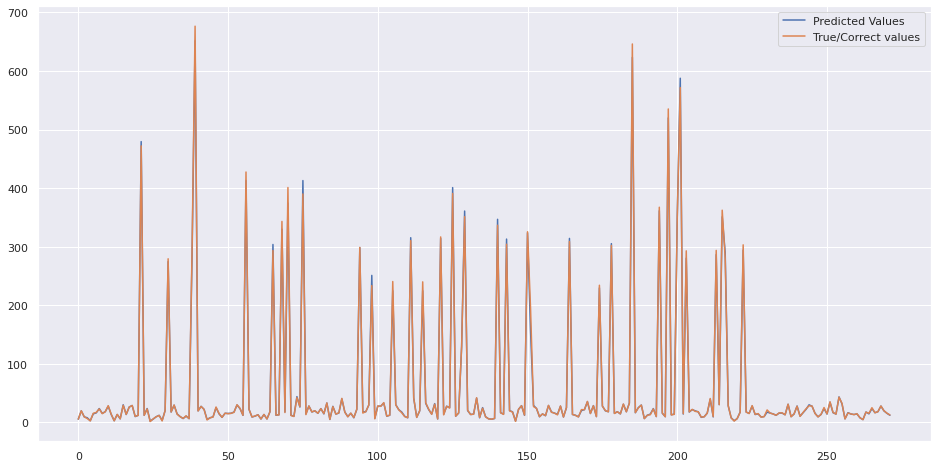

In [16]:
 plt.figure(figsize = (16,8))
 plt.plot(y_pred, label='Predicted Values')
 plt.plot(y_test, label='True/Correct values')
 plt.legend(loc='best')
 plt.show() 